# House Pricing Prediction Model 
##### We are wanting to sale price based on other features
#### libraries Used 

In [203]:
#import statements

import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score 
#read file method
def readFile(fileName):
    data = pd.read_excel(fileName)
    return data

    


#### data set features 

In [204]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8384 entries, 0 to 8383
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sale_date                    8384 non-null   datetime64[ns]
 1   sale_price                   8384 non-null   int64         
 2   house_square_feet            8384 non-null   int64         
 3   attic_finished_square_feet   8384 non-null   int64         
 4   basement_square_feet         8384 non-null   int64         
 5   attached_garage_square_feet  8384 non-null   int64         
 6   detached_garage_square_feet  8384 non-null   int64         
 7   fireplaces                   8384 non-null   int64         
 8   hvac_description             8384 non-null   object        
 9   exterior                     8384 non-null   object        
 10  interior                     8383 non-null   object        
 11  stories                      8384 non-null 

#### read dataset

In [205]:

dataSet = readFile("projectdata.xlsx")
dataSet

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,year_built,bedrooms,bathrooms
0,380000,2157,0,0,528,0,0,1993,3,3
1,383000,2238,0,0,396,0,0,2017,4,3
2,419900,1452,0,0,0,0,1,1965,3,2
3,251660,832,0,0,0,0,0,1919,2,1
4,500000,1780,0,384,484,0,1,1955,3,2
...,...,...,...,...,...,...,...,...,...,...
16809,2000,3062,0,0,438,0,1,2004,4,3
16810,96103,1370,0,0,400,0,1,2003,3,3
16811,140000,850,360,810,0,0,1,1948,3,1
16812,203000,1894,0,0,0,0,1,1905,3,1


In [206]:
#check for duplicates 
dataSet.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16809    False
16810    False
16811    False
16812    False
16813    False
Length: 16814, dtype: bool

In [207]:
#replace empty values 
dataSet = dataSet.dropna()
dataSet
dataSet.dropna(inplace = True)


<Axes: >

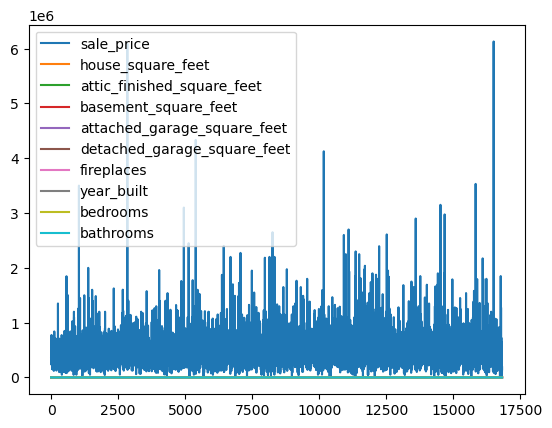

In [208]:
#visual of data 
dataSet.plot()

In [214]:
def modifyData(dataFrame):
    dataSet = dataFrame
    #change year built to age
    dataSet["age"] = 2020 - dataSet["year_built"]
    #combine garage sizes for ontly one var
    dataSet["garageSize"] = dataSet["attached_garage_square_feet"] + dataSet["detached_garage_square_feet"]
    #get total square footage by combining attic, house and basement sqft
    dataSet["totalSqft"] = dataSet["house_square_feet"] + dataSet["attic_finished_square_feet"] + dataSet["basement_square_feet"]

    #split the training data
    #all the xValues from the excel file
    X = dataSet[["totalSqft","garageSize", "age","bedrooms","bathrooms","stories"]]
    
    #target value 
    #the resulting value
    y = dataSet["sale_price"]

    return X, y


### User input


In [215]:
def getUserInput():
    i = 0
    #while loop for error handling
    while(i < 1):
        #error handling to force the user to enter an integer
        try:
            sqft = int(input("Enter the square footage: "))
            garageSqft = int(input("Enter the garage size: "))
            numBedrooms =int(input("Enter the number of bedrooms: "))
            numBathrooms = int(input("Enter the number of bathrooms: "))
            age =int(input("Enter the age of the house: "))
            stories = int(input("Enter the number of stories"))
            houseData = [sqft,garageSqft,age,numBedrooms,numBathrooms,stories]
            print(houseData)
            i = 1;
        #if the user does not enter an integer reset
        except ValueError:
            print("Integer input only")
    #return an array with the entered house data
    return houseData

In [216]:

#call readFile with an excel file
dataSet = readFile("cleanData.xlsx")
#call modifyData
X,y = modifyData(dataSet)

In [217]:
#predict price method
def predictPrice(X,y,inputArray):

    #create the model
    m1 = GradientBoostingRegressor(n_estimators=1500)

    
    #train the model
    m1.fit(X,y)

    #predict the value based on the input array
    predictedValue = m1.predict([inputArray])

    #return the predicted value
    return predictedValue

In [218]:
#call getUserInput method
userHome = getUserInput()
predictedValue = predictPrice(X,y,userHome)

print(predictedValue)
#["totalSqft","garageSize", "age","bedrooms","bathrooms","stories"]
#predictedPrice = m1.predict([[1500,440,18,3,3,2]])
#print(predictedPrice)
#predict2 = m2.predict([[1500,440,18,3,3,2]])
#predict the house price off user input
#predict2 = m2.predict([userHome])
#print(predict2)

Enter the square footage:  3000
Enter the garage size:  4000
Enter the number of bedrooms:  3
Enter the number of bathrooms:  2
Enter the age of the house:  44
Enter the number of stories 2


[3000, 4000, 44, 3, 2, 2]
[627639.67333898]


/Users/michellemarquez/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [219]:
print("\nFeature Weights (Slopes):")
for feature, coef in zip(["totalSqft","garageSize", "age","bedrooms","bathrooms","stories"], m1.coef_):
    print(f"{feature}: {coef}")


Feature Weights (Slopes):
totalSqft: 173.70444811292796
garageSize: 101.62979218146668
age: 86.23336702070611
bedrooms: -54386.05840669307
bathrooms: 10741.136924506183


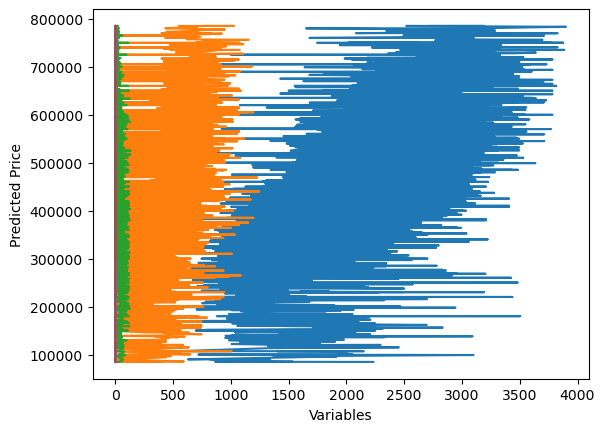

In [220]:
plt.plot(X, y)
plt.xlabel("Variables")
plt.ylabel("Predicted Price")
plt.show()

In [221]:
#data set storted
ds_sorted = dataSet.sort_values(by = 'age', ascending = True)
ds_sorted

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,...,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer,age,garageSize,totalSqft
2830,2020-12-23,381110,1792,0,0,342,0,1,Forced Air,Frame Siding,...,Composition Shingle,2021,4,2,NaN,NaN,SEWER/SEPTIC INSTALLED,-1,342,1792
2615,2020-12-01,375000,1939,0,0,590,0,1,Forced Air,Frame Siding,...,Composition Shingle,2021,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED,-1,590,1939
3930,2020-12-31,410995,1792,0,0,342,0,1,Forced Air,Frame Siding,...,Composition Shingle,2021,4,2,NaN,NaN,SEWER/SEPTIC INSTALLED,-1,342,1792
237,2020-06-25,220000,3436,0,0,936,0,1,Forced Air,Frame Siding,...,Composition Shingle,2021,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED,-1,936,3436
5601,2020-12-14,463522,1564,0,0,484,0,1,Forced Air,Frame Siding,...,Composition Shingle,2021,3,2,NaN,NaN,SEWER/SEPTIC AVAIL,-1,484,1564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,2020-09-28,525000,1522,0,0,0,0,1,Forced Air,Frame Siding,...,Composition Shingle,1890,2,2,NaN,NaN,SEWER/SEPTIC INSTALLED,130,0,1522
164,2020-10-01,196000,1092,0,0,0,0,1,Electric Baseboard,Frame Siding,...,Composition Shingle,1890,3,1,NaN,NaN,SEWER/SEPTIC INSTALLED,130,0,1092
3621,2020-11-05,403000,1068,0,0,0,0,1,Electric Baseboard,Frame Siding,...,Composition Shingle,1890,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED,130,0,1068
6667,2020-01-24,517000,1965,0,0,0,0,1,Hot Water Baseboard,Frame Siding,...,Composition Shingle,1890,3,1,NaN,NaN,SEWER/SEPTIC INSTALLED,130,0,1965


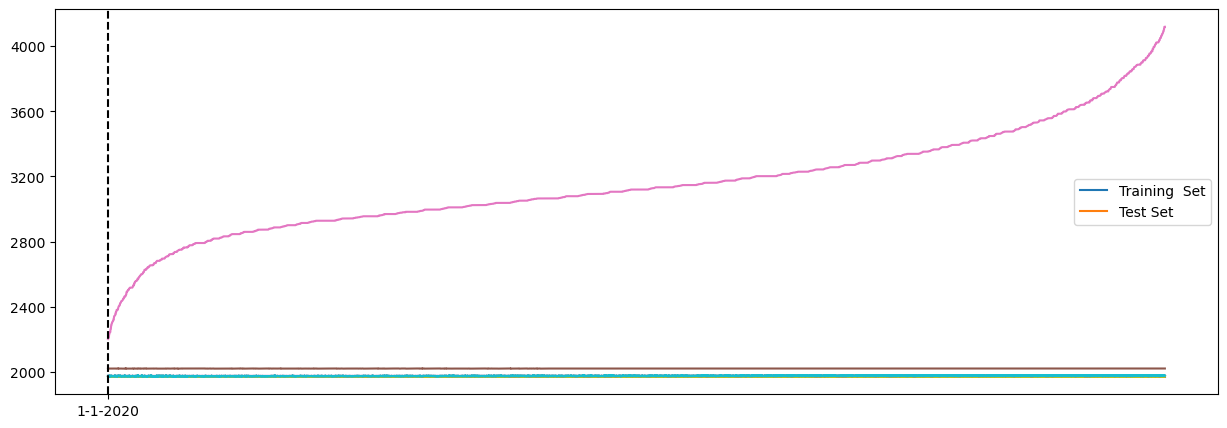

In [222]:
#only using data from 2020

train = dataSet.loc[dataSet.index < 1-1-2020]
test = dataSet.loc[dataSet.index >=  1-1-2020]
fig,ax = plt.subplots(figsize = (15,5))
train.plot(ax =ax, label = 'Training Set')
test.plot(ax = ax, label = 'Test' ) 
ax.axvline('1-1-2020', color='black', ls = '--')
ax.legend(['Training  Set', 'Test Set' ])
plt.show()


In [223]:
#check for null, missing values 
dataSet.isnull().sum()

sale_date                         0
sale_price                        0
house_square_feet                 0
attic_finished_square_feet        0
basement_square_feet              0
attached_garage_square_feet       0
detached_garage_square_feet       0
fireplaces                        0
hvac_description                  0
exterior                          0
interior                          1
stories                           0
roof_cover                        1
year_built                        0
bedrooms                          0
bathrooms                         0
waterfront_type                8293
view_quality                   8169
utility_sewer                     0
age                               0
garageSize                        0
totalSqft                         0
dtype: int64

/Users/michellemarquez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

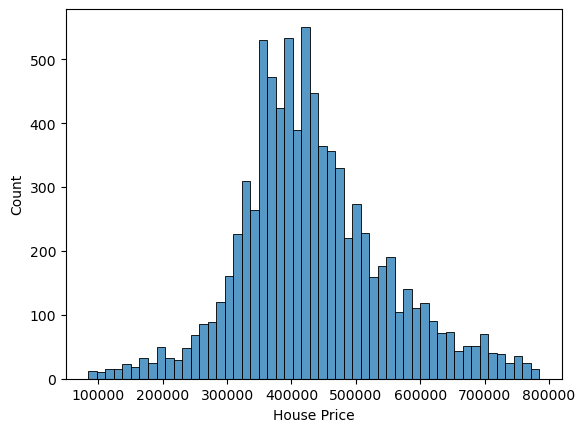

In [224]:
#Visual of data

sns.histplot(dataSet["sale_price"])
plt.xlabel("House Price") 
plt.show

In [232]:
#build heatmap to understand correlation
plt.figure(figsize=(10,8))
correlation = dataSet.corr()
sns.heatmap(correlation)


ValueError: could not convert string to float: 'Forced Air'

<Figure size 1000x800 with 0 Axes>

In [227]:
#implement and train the model 
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [228]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)
X_train, X_test, y_train, y_test                                                   

(      totalSqft  garageSize  age  bedrooms  bathrooms  stories
 4753       1934         560   27         4          3        2
 6508       3118         622   14         4          3        2
 4958       1720           0   58         3          2        1
 6570       2330        1080   45         4          3        2
 2635       1672         440   48         4          3        2
 ...         ...         ...  ...       ...        ...      ...
 1099        780           0   77         2          1        1
 2514       1843         640   23         4          3        2
 6637       2664         888   21         3          3        2
 2575       1352         420   40         3          3        2
 7336       1792         441   56         4          3        1
 
 [6707 rows x 6 columns],
       totalSqft  garageSize  age  bedrooms  bathrooms  stories
 2655       1596         500   29         3          2        1
 7725       3311        1000   15         5          3        2
 2325       

In [229]:
#train the model
model.fit(X_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [230]:
#prediction
pred = model.predict(X_train)
pred


array([457691.94, 525263.7 , 392168.  , ..., 544068.44, 372149.94,
       483760.78], dtype=float32)

In [231]:
r2 = r2_score(y_test, y_pred)
r2

ValueError: Found input variables with inconsistent numbers of samples: [1677, 6707]